# Ayudantía N°1
(Regresión Logística, Árboles de decisión y métodos de ensamble)

Carlos Sepúlveda Morales
email: carlos.sepulveda@alumnos.uai.cl

---

In [ ]:
# para subir archivos a colab desde sistema local de archivos
from google.colab import files

def uploadeFiles():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
    return uploaded

# para subir un archivo desde el sistema local (PC)
uploadedFile = uploadeFiles()

Saving houses_prices_data.csv to houses_prices_data.csv
User uploaded file "houses_prices_data.csv" with length 702 bytes


In [ ]:
# para subir archivos desde Google Drive
path2mount = '/content/drive/'
path2drive = '/content/drive/My Drive/'
from google.colab import drive
drive.mount(path2mount)


Mounted at /content/drive/


In [ ]:
# Escribir archivo txt en drive
# se dene reemplazar 'ayudantia/archivo' con el path a la carpeta individual.
with open(path2drive +'ayudantia/borrame1.txt', 'w') as f:
  f.write('Hello Google Drive!')

--- 
## Regresión Logística

La regresión lógistica se usa cuando por medio de una combinación lineal de variables explicativa, queremos predecir el resultado de una variable categorica (o sea tenemos un número limitado de clases). La salida de la regresión logistica es una probabilidad de pertenecer a una determinada clase. 

Analisemos el caso más simple donde tenemos sólo dos clases.

In [ ]:
# Librerías por defecto para este caso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('houses_prices_data.csv')
df.head(10)

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


In [ ]:
datafile = path2drive+'ayudantia/toyMotorDataset.txt'
df = pd.read_csv(datafile)
df.columns = df.columns.str.strip()
df['Estado Motor'] =df['Estado Motor'].str.strip()
df.head()

,RPM,Estado Motor
0,65,normal
1,70,normal
2,80,normal
3,80,normal
4,80,normal


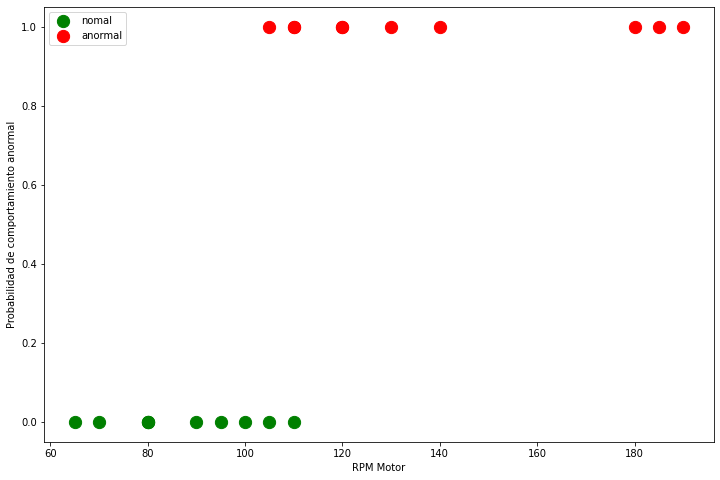

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df[df['Estado Motor']== 'normal']['RPM'], [0]* len(df[df['Estado Motor']== 'normal']), 
            marker='o', c='green', s=150, label='nomal')

plt.scatter(df[df['Estado Motor']== 'anormal']['RPM'], [1]* len(df[df['Estado Motor']== 'anormal']), 
            marker='o', c='red', s=150, label='anormal')
plt.legend()
plt.ylabel('Probabilidad de comportamiento anormal')
plt.xlabel('RPM Motor')
plt.show()


Lo que buscamos es dada una entrada $X$ predecir una etiqueta $Y$ como resultado. O sea buscamos encontrar la distribución condicional de la variable $Y$ dado el conjunto de entrada $X$, lo que expresamos como $ Pr(Y| x)$.

Asumamos que $Pr(Y=1|X=x,\theta) =p(x,\theta)$ y  $Pr(Y=0|X=x,\theta) =1-p(x,\theta)$ son función parametrizada por $\theta$ y asumamos que las observaciones son independientes una de otra.

Los datos se Distribuyen como una Distribución de Bernulli (Binomial para el caso binario), esto es:

$$(Y_i | x_{1,i}, \ldots, x_{m,i}, \theta) \sim \text{Bernulli}(p=p(x,\theta))$$
con función de probabilidad asociada:

$P(Y=y | X=x, \theta) = f(y;p) = p^y (1-p)^{(1-y)}$, para $y=0,1$

Dado los ejemplos de entrenamiento muestreados de forma independiente $(x_i,y_i), 1\leq i \leq n$ de la distribución conjunta, la máxima verosimilitud $L$, esta dada por:

$$L(\theta) = \prod_{i=1}^{n}{f(y_i;p(x_i;\theta))}=\prod_{i=1}^{n}{p(x_i;\theta)}^{y_i}{(1-p(x_i;\theta))}^{(1-y_i)}$$

Ahora podemos maximizar la verosimilitud $L(\theta)$ y obtener el **Estimador de Máxima Verosimilitud (MLE)** y de esta forma obtener los parámetros $\theta$ del modélo. Es más sencillo hacer esto a la log-verosimilitud, ya que transofrma las multiplicaciones en sumas, por lo que lo se maximiza es:
$$\log{L(\theta)} = \sum_{i=1}^{n}{{y_i \log{p(x_i;\theta)}} + {(1-y_i)\log{(1-p(x_i;\theta))}}}$$ 



Sin algunas restricciones, la estimación del modelo no homogeno de bernulli por MLE no funciona; obtendríamos $p_i=1$ cuando $y_i=1$, $p_i=0$ cuando $y_i=0$. Los $p_i= p(x_i, \theta)$ no son números arbitrarios, dependen de un parámetro. Suponiendo que conocemos la función de probabilidad (salvo el parámetro $\theta$) basta con maximizar $L$ para encontrar los parámetros.
Hasta aquí tenemos una variable binaria $Y$ y deseamos modelar la probabilidad condicional  $Pr(Y=1|X=x;\theta)$ como una función de x, cualquier parametro desconocido en la función debe ser estimado por máxima verosimilitud. 
¿Cómo podemos usar la regresión lineal para resolver este problema?

1. La idea más obvia es hacer $p(x)$ una función lineal de $x$. El problema de esto es que $p$ debe estar entre 0 y 1 (la función lineal no es acotada).
2. Una opción sencilla sería hacer $\log{p(x)}$ una función lineal de x, el problema es que está es no acotada tambien. Necesitamos una función continua y acotada que pueda comprimir nuestro espacio de entrada $x \in [-\infty, ∞] $ a un espacio de salida entre 0 y 1.
3. la función logistica (o logit) puede hacer esto, $\log{\frac{p}{1-p}}$. Podemos hacer esto una función lineal de $x$.

$$ \log{\frac{p(x)}{1-p(x)}} = \theta_0 + x \cdot \theta_1$$

resolviendo para $p$, esto da:
$$p(x,\theta_0, \theta_1) = \frac{1}{1 + e^{-(\theta_0 + x \cdot \theta_1)}}$$


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual



@interact
def plot_logreg(b0=widgets.FloatSlider(min=-100, max=100, step=0.1, value = -46,
                                       description='theta 0'), 
                b1=widgets.FloatSlider(min=-1, max=1, step=0.1, value = 0.5,
                                       description='theta 1')):
  x = np.linspace(60, 180, 100)
  regLog = lambda b0, b1, x: 1 / (1 + np.exp(-(b0 + b1*x)))
  regLin = lambda b0, b1, x: b1*x + b0
  ylog = regLog(b0, b1, x)
  #ylin = regLin(b0, b1, x)

  plt.figure(figsize=(12,8))
  plt.scatter(x, ylog, color='gold')
  #plt.scatter(x, ylin, color='blue')
  
  plt.scatter(df[df['Estado Motor']== 'normal']['RPM'], [0]* len(df[df['Estado Motor']== 'normal']), 
              marker='o', c='green', s=150, label='nomal')

  plt.scatter(df[df['Estado Motor']== 'anormal']['RPM'], [1]* len(df[df['Estado Motor']== 'anormal']), 
              marker='o', c='red', s=150, label='anormal')
  
  #datos a predecir
  toPredict = np.array([67, 110, 120, 80, 90])
  probPredict = regLog(b0,b1,toPredict)

  plt.scatter(toPredict, probPredict, 
              marker='*', c='darkblue', s=150, label='estimado')
  
  plt.legend()
  plt.ylabel('Probabilidad de comportamiento anormal')
  plt.xlabel('RPM Motor')
  plt.show()


  

interactive(children=(FloatSlider(value=-46.0, description='theta 0', min=-100.0), FloatSlider(value=0.5, desc…

# Ajuste de los los parámetros ($\theta_0$ y $\theta_1$)?
## <font color='darkred'> Estimación de Máxima Verosimilitud (Maximum Likelihood Estimation) </font>

MLE está dado por:
$$\max_\theta \log{L(\theta)} = \sum_{i=1}^{n}{{y_i \log{p(x_i;\theta)}} + {(1-y_i)\log{(1-p(x_i;\theta))}}}$$ 

lo que es equivalente a minimizar:

$$\min_\theta -\log{L(\theta)} = \sum_{i=1}^{n}{{y_i \log{p(x_i;\theta)}} - {(1-y_i)\log{(1-p(x_i;\theta))}}}$$ 

haciendo $p(x_i;\theta) = \hat{y}$, tenemos que:
$$\min_\theta -\log{L(\theta)} = \sum_{i=1}^{n}{- y_i \log{\hat{y_i}} - (1-y_i)\log{(1-\hat{y_i})}} = \min_\theta \ell(y, \hat{y}(\theta))$$

A $\ell(y, \hat{y}(\theta))$ le llamaremos *logistic loss*. En valor de $y$ es fijo (viene dado por el conjunto de entrenamiento) y el valor de $\hat{y}$ depende de $\theta = \theta_0, theta_1$, por lo que $\ell(\theta_0, \theta_1)$


#### <font color='darkred'> Minimizar la función de pérdida logística es lo mismo que maximizar la log-verosimilitud</font>


Ahora con esto podemos ajustar el modelo usando MLE. Para cada dato de entrenamiento, tenemos un vector de características $x_i$, y una clase observada $y_i$. 

$$\ell(\theta_0, \theta_1) = {\sum_{i=1}^{n} {y_i \log{p(x_i)}} + (1-y_i)\log{(1-p(x_i))}} $$

$$ \qquad \quad= \sum_{i=1}^{n} \log{1} - p(x_i) + \sum_{i=1}^{n} y_i \log{\frac{p(x_i)}{1-p(x_i)}}$$

$$\qquad \qquad \quad = ∑_{i=1}^{n} -\log(1) + e^{(\theta_0 + x_i \cdot \theta_1)} + \sum_{i=1}^{n} y_i (\theta_0 + x_i \cdot \theta_1)$$

ahora basta con derivar la log-verosimilitud respecto de los parámetros $\theta_j$, $j={0,1}$.

$$\frac{∂\ell}{∂ \theta_j} = -∑_{i=1}^{n} \frac{1}{1 + e^{(\theta_0 + x_i \cdot \theta_1)}}{e^{(\theta_0 + x_i \cdot \theta_1)}}x_{ij} + \sum_{i=1}^{n} y_i x_{ij}$$

$$\left({\frac{∂\ell}{∂ \theta_0},\frac{∂\ell}{∂ \theta_1}}\right) = \left({\sum_{i=1}^{n}{(y_i-p(x_i, \theta_0,\theta_1)}),\sum_{i=1}^{n}{(y_i-p(x_i, \theta_0,\theta_1))x_i} }\right)$$

No podemos igual a cero y resolver de manera exacta, ya que es una ecuación trascendente, pero se puede aproximar numéricamente, por ejemplo mediante el método de Newton para optimización numérica o por medio de descenso por el gradiente (Siempre moverse una pequeña cantidad en la dirección de mayor decremento).


### Descenso por el gradiente

$$\theta_{0}^{t+1} = \theta_{0}^{t} + \lambda \cdot \sum_{i=1}^{n}(y_i - p(x_i;\mathbf{θ}^{(t)}))$$

$$\theta_{1}^{t+1} = \theta_{1}^{t} + \lambda \cdot \sum_{i=1}^{n}(y_i - p(x_i;\mathbf{θ}^{(t)}))x_i$$

donde λ > 0 es el _*learning rate*_

---

## Regresión Logística con más de dos clases

Si $Y$ puede tomar mas de dos valores, $k$ de ellos, todavía es posible usar regresión log´sitica. En lugar de tener un set de parámetros $\theta_0, \theta_1$, cada clase $c$ en $o:(k-1)$ tendrá su propio intercepto $\theta_o^{(c)}$ y y vector $\theta^{(c)}$, haciendo que la probabilidad condicional sea:
$$Pr(Y=c|\vec{X} = x) = \frac{e^{\theta_0^{(c)} + x \cdot \theta^{(c)}}}{\sum_c e^{\theta_0^{(c)} + x \cdot \theta^{(c)}}}$$

---

## Cómo clasificamos las nuevas observaciones:

Despues que el modelo de regresión logistica ha sido ajustado a los datos de entrenamiento, esto es:
$$p(x;\mathbf{\theta}) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x)}}$$

podemos usar la siguiente regla de desicion para una nueva observación $x_0$:

$$\text{Asigna etiqueta} \qquad y_0 =1 \iff p(x_0;\mathbf{\theta}) > \frac{1}{2}$$

## Implementando desde cero

Para implementar un clasificado necesitamos lo siguientes elementos:


```python

class LRfromScratch:
  def __init__():
    pass
  def fit():
    pass
  def predict():
  
  def auxFunc():
    pass

```


In [ ]:
import pandas as pd
import numpy as np
class LogRfromScratch:
  
  def __init__(self):
    self.losses = []             # Para almacenar el valor de la función de pérdida
    self.train_accuracies =  []  # Para almacenar el valor de accuracy en cada iteracion
    
  
  #def _sigmoid(self, x, weight):
  #  z = np.dot(x, weight)
  #  return 1 / (1 + np.exp(-z))

  
  # versión estable numéricamente
  def _sigmoid(self, x):
    return np.piecewise(
        x,
        [x > 0],
        [lambda i: 1 / (1 + np.exp(-i)), lambda i: np.exp(i) / (1 + np.exp(i))],
    )

  def loss(self, h, y):
    epsilon = 1e-5
    return (-y * np.log(h + epsilon) - (1-y)* np.log(1-h +epsilon)).mean()
    #return (-y * np.log(h) - (1-y)* np.log(1-h)).mean()

  def gradient_descent(self, X, h, y):
    return np.dot(X.T, (h-y)) / y.shape[0]

  def fit(self, x,y, lr=0.01, iterations=10):
    self.intercept = np.ones((x.shape[0], 1))  # agrego una dimensión adicional para el intercepto
    self.x = np.concatenate((self.intercept, x), axis=1) # creo un nuevo vector de dimensión d+1
    self.weight = np.zeros(self.x.shape[1]) # inicializo el vector pesos tamaño d+1 x 1 en cero
    self.y = y
    
    for i in range(iterations):
      z = np.dot(self.x, self.weight)
      sigma = self._sigmoid(z)

      loss = self.loss(sigma, self.y)
      self.losses.append(loss)
      dW = self.gradient_descent(self.x, sigma, self.y)
      self.weight -= lr * dW

      ## aquí estaba el error que se vio en clases
      # tenía self.x en lugar de x y el problema era que self.x tiene 1 dimensión
      # más que x (por el intercepto) y al llamar a la función predict volvía a 
      # agregar otra dimensión y el error se arrojaba porque tenia una matriz x con 1 
      # dimensión más que los pesos.
      y_pred = self.predict(x) # 
      ##############################################################


      accu = np.sum(np.equal(self.y, y_pred)) / len(self.y)
      self.train_accuracies.append(accu)
       
    return print(f'LogR fitted successfully')

  def predict(self, x_new, treshold = 0.5):
    intercept = np.ones((x_new.shape[0], 1))
    x_new = np.concatenate((intercept, x_new), axis=1)
    z = np.dot(x_new, self.weight)
    result = self._sigmoid(z)
    result = result >= treshold
    y_pred = np.zeros(result.shape[0])
    for i in range(len(y_pred)):
      if result[i] == True:
        y_pred[i] = 1
      else:
        continue

    return y_pred

  @property
  def get_coef(self):
    return self.weight



In [ ]:
# Convertimos los datos del dataset a númericos.
df['RPM'] = pd.to_numeric(df['RPM'])
df['Estado Motor'].replace(['normal', 'anormal'], [0,1], inplace = True)
df.head(10)

,RPM,Estado Motor
0,65,0
1,70,0
2,80,0
3,80,0
4,80,0
5,90,0
6,95,0
7,105,0
8,100,0
9,110,0


In [ ]:
# separamos nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train= df[['RPM']] 
y_train =df['Estado Motor']


cclf = LogRfromScratch()
cclf.fit(x_train, y_train, lr= 0.1, iterations=1000)

LogR fitted successfully


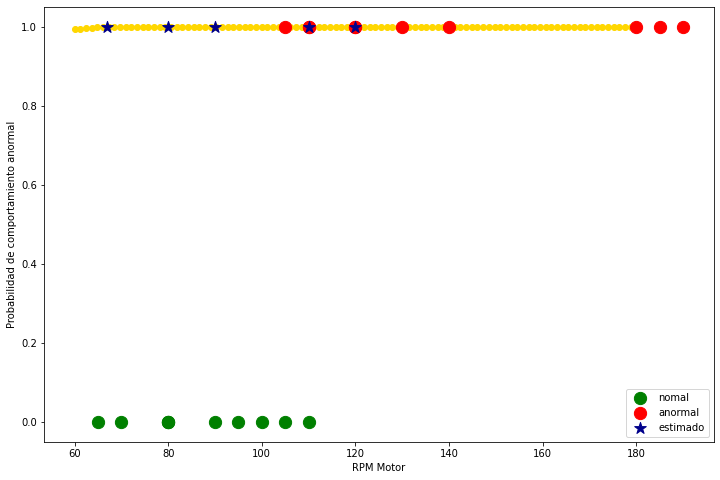

In [ ]:
x = np.linspace(60, 180, 100)
b0 = cclf.get_coef[0]
#b0=0
b1 = cclf.get_coef[1]


regLog = lambda b0, b1, x: 1 / (1 + np.exp(-(b0 + b1*x)))

ylog = regLog(b0, b1, x)


plt.figure(figsize=(12,8))
plt.scatter(x, ylog, color='gold')


plt.scatter(df[df['Estado Motor']== 0]['RPM'], [0]* len(df[df['Estado Motor']== 0]), 
            marker='o', c='green', s=150, label='nomal')

plt.scatter(df[df['Estado Motor']== 1]['RPM'], [1]* len(df[df['Estado Motor']== 1]), 
            marker='o', c='red', s=150, label='anormal')

#datos a predecir
toPredict = np.array([67, 110, 120, 80, 90])
probPredict = regLog(b0,b1,toPredict)

plt.scatter(toPredict, probPredict, 
            marker='*', c='darkblue', s=150, label='estimado')

plt.legend()
plt.ylabel('Probabilidad de comportamiento anormal')
plt.xlabel('RPM Motor')

plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame = True).frame
#data = load_breast_cancer(as_frame = True)

#x_train, x_test, y_train, y_test = train_test_split(data.data, data['target'])
x_train, x_test, y_train, y_test = train_test_split(data[['mean area']], data['target'])
regressor = LogRfromScratch()
regressor.fit(x_train,y_train, 0.01, 5000)

y_pred = regressor.predict(x_train)
print(f'accuracy training ->{sum(y_pred == y_train) / y_train.shape[0]}')

y_pred_test = regressor.predict(x_test)
print(f'accuracy test ->{sum(y_pred_test == y_test) / y_test.shape[0]}')

LogR fitted successfully
accuracy training ->0.3967136150234742
accuracy test ->0.3006993006993007


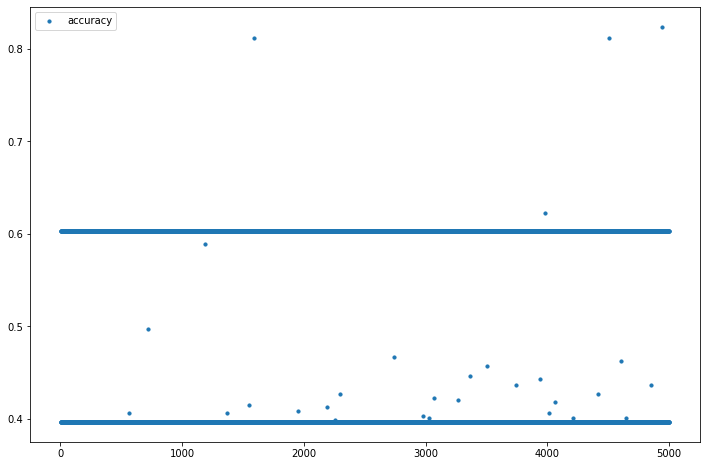

In [ ]:
plt.figure(figsize=(12,8))
x = np.linspace(1, 5000, 5000)
plt.scatter(x, np.array(regressor.train_accuracies), s=10, label='accuracy')
plt.legend()

Se puede ver que la regresión con un único parametro y esta implementación sencilla es bastante mala

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


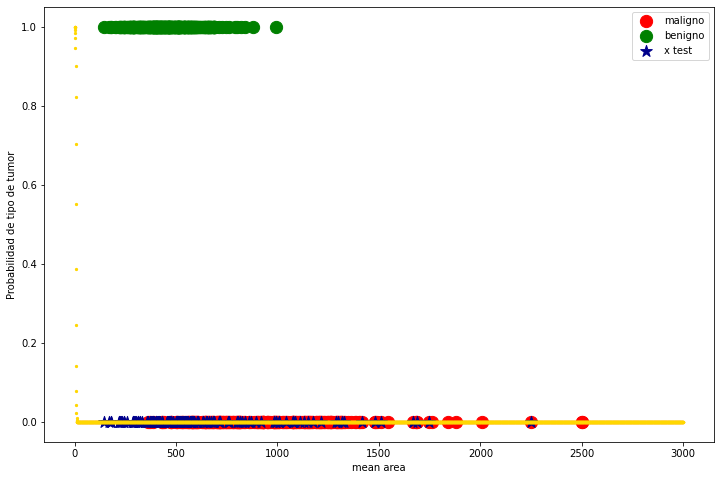

In [ ]:

index_feature = 3
xdata = data['mean area']
feature_name = xdata.name
y = data.target
# 0 para maligno, 1 para benigno
label_0 = 'maligno'
label_1 = 'benigno'

plt.figure(figsize=(12,8))
#plt.scatter(x, ylog, color='gold')


plt.scatter(xdata[y == 0], [0]* len(xdata[y == 0]), 
            marker='o', c='red', s=150, label= label_0)

plt.scatter(xdata[y == 1], [1]* len(xdata[y == 1]), 
            marker='o', c='green', s=150, label= label_1)

plt.scatter(x_test, y_pred_test, 
            marker='*', c='darkblue', s=150, label='x test')


regLin = lambda b0, b1, x: b1*x + b0
b0 = regressor.get_coef[0]
b1 = regressor.get_coef[1]
x = np.linspace(0, 3000, 6000)
ylog = regLog(b0, b1, x)
plt.scatter(x, ylog, color='gold', s=5)

plt.legend()
plt.ylabel('Probabilidad de tipo de tumor')
plt.xlabel(feature_name)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)


y_pred = clf.predict(x_train)
print(f'accuracy training ->{sum(y_pred == y_train) / y_train.shape[0]}')

y_pred_test = clf.predict(x_test)
print(f'accuracy test ->{sum(y_pred_test == y_test) / y_test.shape[0]}')

accuracy training ->0.863849765258216
accuracy test ->0.916083916083916


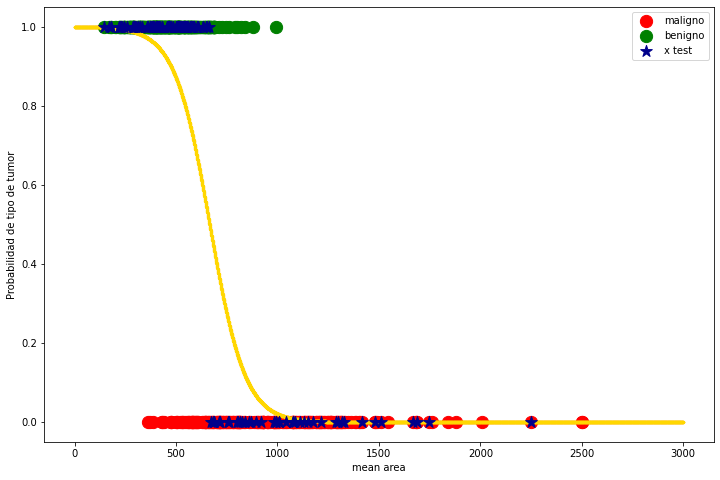

In [ ]:
index_feature = 3
xdata = data['mean area']
feature_name = xdata.name
y = data.target
# 0 para maligno, 1 para benigno
label_0 = 'maligno'
label_1 = 'benigno'

plt.figure(figsize=(12,8))



plt.scatter(xdata[y == 0], [0]* len(xdata[y == 0]), 
            marker='o', c='red', s=150, label= label_0)

plt.scatter(xdata[y == 1], [1]* len(xdata[y == 1]), 
            marker='o', c='green', s=150, label= label_1)


regLin = lambda b0, b1, x: b1*x + b0
b0 = clf.intercept_
b1 = clf.coef_
x = np.linspace(0, 3000, 6000)
ylog = regLog(b0, b1, x)
plt.scatter(x, ylog, color='gold', s=5)

plt.scatter(x_test, y_pred_test, 
            marker='*', c='darkblue', s=150, label='x test')

plt.legend()
plt.ylabel('Probabilidad de tipo de tumor')
plt.xlabel(feature_name)

plt.show()

Un mucho mejor fitting !!!

In [ ]:
# Implementación simple de regresión lienal con descenso por el gradiente
class LRfromScratch:
  
  def __init__(self):
    self.losses = []             # Para almacenar el valor de la función de pérdida
    
    
  def loss(self, y, y_pred):
    return np.square((y-y_pred)).mean()

  def gradient(self, X, y_pred, y):
    return -(2 * np.dot(X.T, (y-y_pred)) ) / y.shape[0] 

  def fit(self, x,y, lr=0.01, epochs=10):
    self.intercept = np.ones((x.shape[0], 1))  
    self.x = np.concatenate((self.intercept, x), axis=1)
    self.weight = np.zeros(self.x.shape[1])
    self.y = y
    
    for i in range(epochs):
      y_pred = np.dot(self.x, self.weight)
      
      
      loss = self.loss(self.y, y_pred)
      print(f'loss:{loss}')
      self.losses.append(loss)
      
      dW = self.gradient(self.x, y_pred, self.y)
      print(f'dw:{dW}')
      self.weight -= lr * dW
      print(f'weight:{self.weight}')
    
    return print(f'LR fitted successfully')

  def predict(self, x_new, treshold = 0.5):
    intercept = np.ones((x_new.shape[0], 1))
    x_new = np.concatenate((intercept, x_new), axis=1)
    y_pred = np.dot(x_new, self.weight)
    return y_pred
  
  @property
  def get_coef(self):
    return self.weight